In [2]:
import cv2
import os
from pathlib import Path
from tqdm import tqdm

In [3]:
# Caminhos
raw_video_dir = Path("../data/raw")
output_frame_dir = Path("../data/frames")

output_frame_dir.mkdir(parents=True, exist_ok=True)

# Definições
FRAME_RATE = 1
FRAME_SIZE = (224, 224)

In [4]:
def extract_frames(video_path, output_dir, rate=1, resize=(224,224)):
    cap = cv2.VideoCapture(str(video_path))
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(round(fps / rate))

    count = 0
    saved = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_interval == 0:
            frame = cv2.resize(frame, resize)
            frame_name = f"frame_{saved:04d}.jpg"
            cv2.imwrite(str(output_dir / frame_name), frame)
            saved += 1
        count += 1
    cap.release()
    return saved

In [5]:
video_files = list(raw_video_dir.glob("*.mp4"))

print(f"🎬 Encontrados {len(video_files)} vídeos.")

for video_path in tqdm(video_files):
    video_id = video_path.stem
    output_path = output_frame_dir / video_id
    output_path.mkdir(parents=True, exist_ok=True)
    
    n_saved = extract_frames(video_path, output_path, rate=FRAME_RATE, resize=FRAME_SIZE)
    print(f"{video_id}: {n_saved} frames guardados.")

🎬 Encontrados 30 vídeos.


  3%|▎         | 1/30 [00:15<07:29, 15.49s/it]

C33I: 307 frames guardados.


  7%|▋         | 2/30 [00:30<07:07, 15.27s/it]

B36R: 305 frames guardados.


 10%|█         | 3/30 [00:45<06:53, 15.31s/it]

C46R: 305 frames guardados.


 13%|█▎        | 4/30 [01:01<06:35, 15.23s/it]

B61D: 305 frames guardados.


 17%|█▋        | 5/30 [01:15<06:13, 14.94s/it]

C36X: 304 frames guardados.


 20%|██        | 6/30 [01:30<05:58, 14.92s/it]

C16G: 305 frames guardados.


 23%|██▎       | 7/30 [01:45<05:43, 14.92s/it]

C58C: 309 frames guardados.


 27%|██▋       | 8/30 [02:00<05:29, 14.96s/it]

A99X: 304 frames guardados.


 30%|███       | 9/30 [02:15<05:16, 15.05s/it]

A61V: 305 frames guardados.


 33%|███▎      | 10/30 [02:30<05:01, 15.08s/it]

A40E: 305 frames guardados.


 37%|███▋      | 11/30 [02:45<04:44, 14.99s/it]

C42I: 302 frames guardados.


 40%|████      | 12/30 [03:00<04:27, 14.88s/it]

A99Y: 304 frames guardados.


 43%|████▎     | 13/30 [03:15<04:13, 14.92s/it]

A83X: 304 frames guardados.


 47%|████▋     | 14/30 [03:30<04:00, 15.04s/it]

C43T: 303 frames guardados.


 50%|█████     | 15/30 [03:45<03:45, 15.02s/it]

B53D: 305 frames guardados.


 53%|█████▎    | 16/30 [04:01<03:36, 15.43s/it]

A88O: 320 frames guardados.


 57%|█████▋    | 17/30 [04:17<03:20, 15.40s/it]

C56Y: 311 frames guardados.


 60%|██████    | 18/30 [04:32<03:05, 15.43s/it]

A92O: 305 frames guardados.


 63%|██████▎   | 19/30 [04:48<02:50, 15.46s/it]

C48S: 310 frames guardados.


 67%|██████▋   | 20/30 [05:03<02:33, 15.32s/it]

A41X: 305 frames guardados.


 70%|███████   | 21/30 [05:18<02:17, 15.29s/it]

C18X: 304 frames guardados.


 73%|███████▎  | 22/30 [05:33<02:02, 15.35s/it]

B68G: 306 frames guardados.


 77%|███████▋  | 23/30 [05:48<01:46, 15.26s/it]

A31H: 303 frames guardados.


 80%|████████  | 24/30 [06:03<01:30, 15.10s/it]

A59Z: 302 frames guardados.


 83%|████████▎ | 25/30 [06:18<01:15, 15.05s/it]

A36O: 304 frames guardados.


 87%|████████▋ | 26/30 [06:34<01:00, 15.17s/it]

B12G: 304 frames guardados.


 90%|█████████ | 27/30 [06:49<00:45, 15.25s/it]

C28D: 304 frames guardados.


 93%|█████████▎| 28/30 [07:04<00:30, 15.17s/it]

A66S: 306 frames guardados.


 97%|█████████▋| 29/30 [07:19<00:15, 15.21s/it]

A80U: 306 frames guardados.


100%|██████████| 30/30 [07:34<00:00, 15.16s/it]

B88L: 304 frames guardados.


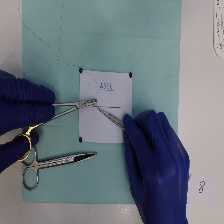

In [6]:
from IPython.display import Image, display

sample_dir = list((output_frame_dir).glob("*"))[0]
sample_frame = list(sample_dir.glob("*.jpg"))[0]

display(Image(filename=str(sample_frame)))

In [7]:
total_videos = len(list(output_frame_dir.glob("*")))
total_frames = len(list(output_frame_dir.glob("*/*.jpg")))

print(f"✅ Extração completa.")
print(f"🎥 Vídeos processados: {total_videos}")
print(f"🖼️ Frames totais gerados: {total_frames}")

✅ Extração completa.
🎥 Vídeos processados: 30
🖼️ Frames totais gerados: 9166
